In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [33]:
linear_df = pd.read_csv("..\Datasets\Final Datasets\Linear1.csv")
#cleaning empty columns
linear_df.dropna(axis=1, how='all', inplace=True)

features = linear_df.drop(columns=['DATE','GDP'])
target = linear_df['GDP']

scaling = StandardScaler()
features_scaled = scaling.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\aksha\AppData\Local\Temp\ipykernel_30496\2537385375.py:1: SyntaxWarning: invalid escape sequence '\D'
  linear_df = pd.read_csv("..\Datasets\Final Datasets\Linear1.csv")


In [34]:
#use XGBRegressor
XGBoost_model = XGBRegressor()
XGBoost_model.fit(X_train, y_train)

y_pred = XGBoost_model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.9999965854792237
mse: 181.8881279639997
mae: 8.9719044507362


In [35]:
#cross validation 
cross_validation_score_xgb = cross_val_score(XGBoost_model, X_train, y_train, cv=5, scoring='r2')
print(f"Gradient boosting cross validation scores for R^2: {cross_validation_score_xgb}")

Gradient boosting cross validation scores for R^2: [0.99999581 0.99999434 0.9999955  0.99999558 0.99999335]


In [36]:
#gridSearchCV
parameters = {
    'n_estimators': [100, 300, 500], 
    'learning_rate': [0.001, 0.05, 0.1, 0.5],  
    'max_depth': [5, 10, 15]  
}

grid_search = GridSearchCV(XGBoost_model, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
print('Best estimator:', grid_search.best_estimator_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 500}
Best score: 0.9999989114120558
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [37]:
#use the best parameters
model = grid_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.9999993569881155
mse: 34.25260398079523
mae: 2.6191236154942796


## Using the best features from eda

16


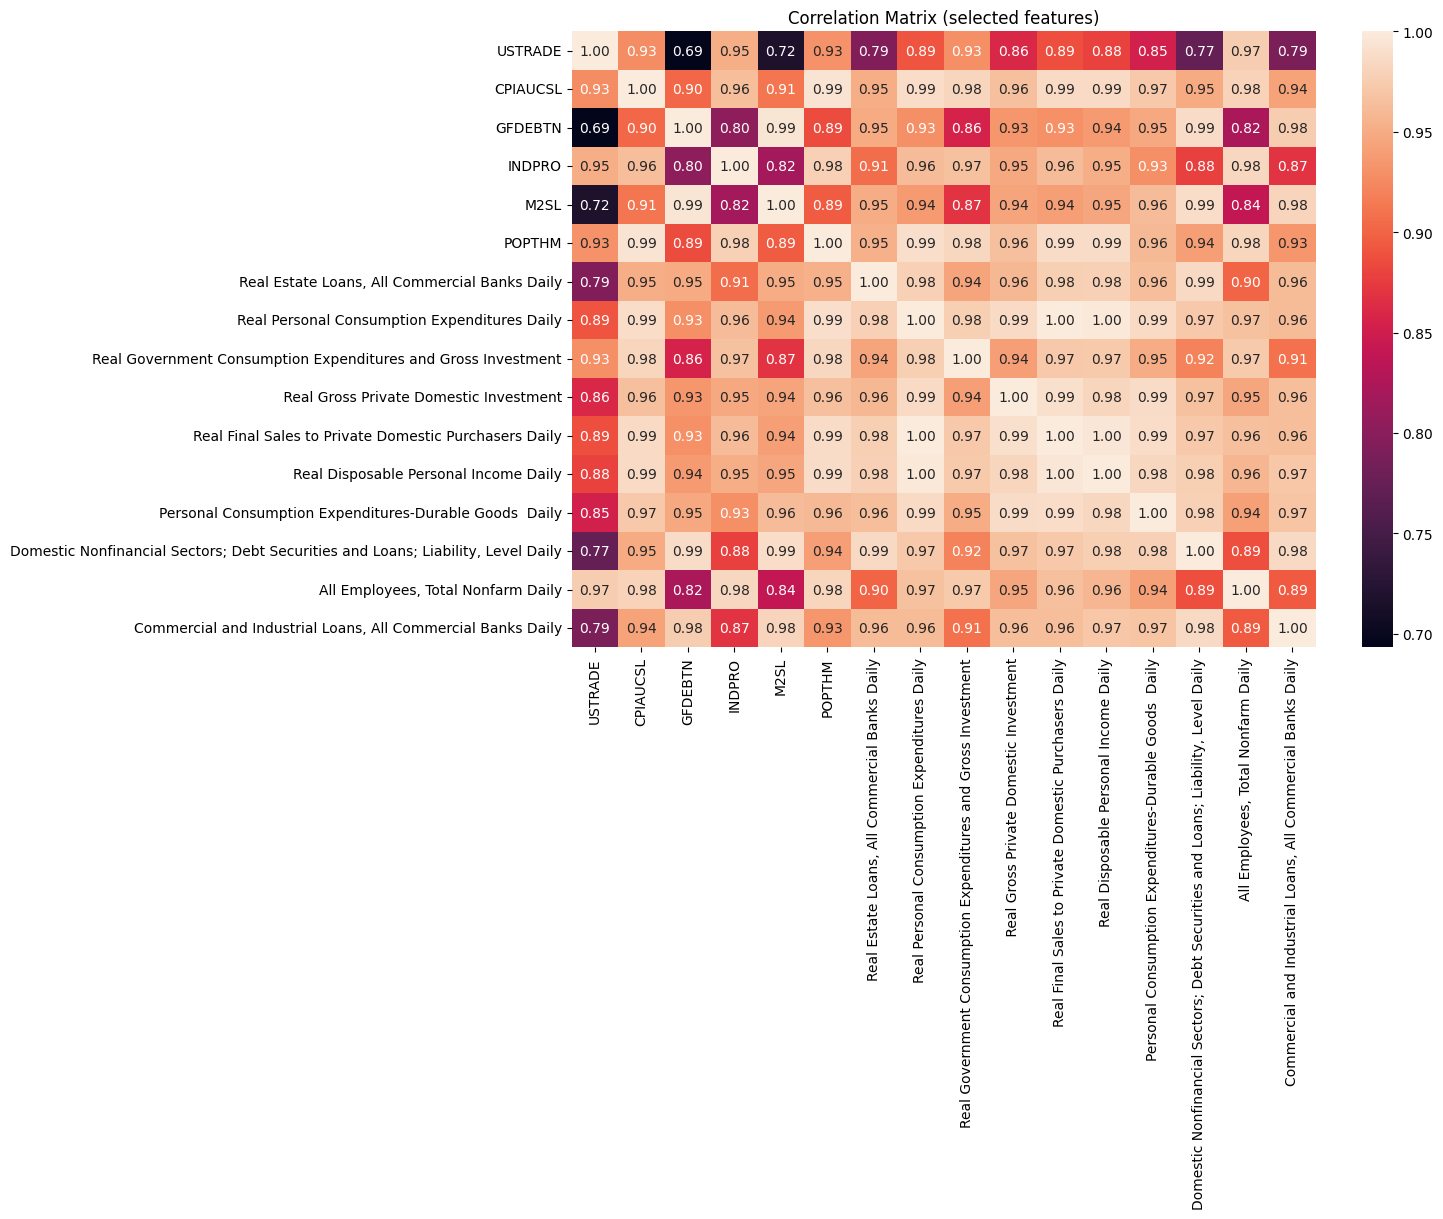

In [38]:
#correlation natrix for the selected features from eda
best_features = ['USTRADE', 'CPIAUCSL', 'GFDEBTN', 'INDPRO', 'M2SL', 'POPTHM', 'Real Estate Loans, All Commercial Banks Daily', 'Real Personal Consumption Expenditures Daily', 'Real Government Consumption Expenditures and Gross Investment', ' Real Gross Private Domestic Investment', 'Real Final Sales to Private Domestic Purchasers Daily', 'Real Disposable Personal Income Daily', 'Personal Consumption Expenditures-Durable Goods  Daily', 'Domestic Nonfinancial Sectors; Debt Securities and Loans; Liability, Level Daily', 'All Employees, Total Nonfarm Daily', 'Commercial and Industrial Loans, All Commercial Banks Daily']
print(len(best_features))
selected_features_df = linear_df[best_features]
correlation_matrix = selected_features_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f') 
plt.title('Correlation Matrix (selected features)')
plt.show()

In [39]:
best_features = ['USTRADE', 'CPIAUCSL', 'GFDEBTN', 'INDPRO', 'M2SL', 'POPTHM', 'Real Estate Loans, All Commercial Banks Daily', 'Real Personal Consumption Expenditures Daily', 'Real Government Consumption Expenditures and Gross Investment', ' Real Gross Private Domestic Investment', 'Real Final Sales to Private Domestic Purchasers Daily', 'Real Disposable Personal Income Daily', 'Personal Consumption Expenditures-Durable Goods  Daily', 'Domestic Nonfinancial Sectors; Debt Securities and Loans; Liability, Level Daily', 'All Employees, Total Nonfarm Daily', 'Commercial and Industrial Loans, All Commercial Banks Daily']

best_features_df = linear_df[best_features]
target = linear_df['GDP']

scaling = StandardScaler()
features_scaled = scaling.fit_transform(best_features_df)

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

In [40]:
#use XGBRegressor
XGBoost_model = XGBRegressor()
XGBoost_model.fit(X_train, y_train)

y_pred = XGBoost_model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.999996419190388
mse: 190.74616896435182
mae: 9.561426669967569


In [41]:
#gridSearchCV
parameters = {
    'n_estimators': [100, 300, 500], 
    'learning_rate': [0.001, 0.05, 0.1, 0.5],  
    'max_depth': [5, 10, 15]  
}

grid_search = GridSearchCV(XGBoost_model, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)
print('Best estimator:', grid_search.best_estimator_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 500}
Best score: 0.9999990524020161
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [42]:
#use the best parameters
model = grid_search.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.9999994110939054
mse: 31.37044232738388
mae: 2.88310989523878


## Running on lagged datasets


In [43]:
best_features = ['DATE', 'DFF', 'USTRADE', 'CPIAUCSL', 'CPALTT01USM657N', 'GFDEBTN', 'GDP', 'INDPRO', 'M2SL', 'POPTHM', 'UNRATE', 'Real_Estate_Loans_All_Commercial_Banks_Daily', 'Real_Personal_Consumption_Expenditures_Daily', 'Real_Government_Consumption_Expenditures_and_Gross_Investment', 'Real_Gross_Private_Domestic_Investment', 'Real_Final_Sales_to_Private_Domestic_Purchasers_Daily', 'Real_Disposable_Personal_Income_Daily', 'Personal_Consumption_Expenditures_Durable_Goods_Daily', 'Personal_Savings_Rate_Daily', 'New_Privately_Owned_Housing_Units_Started_Total_Units_Daily', 'Domestic_Nonfinancial_Sectors_Debt_Securities_and_Loans_Liability_Level_Daily', 'All_Employees_Total_Nonfarm_Daily', 'Commercial_and_Industrial_Loans_All_Commercial_Banks_Daily', 'Employment_Population_Ratio_Daily']
#for file with lagged dataset early 2 months

linear_df = pd.read_csv('..\Datasets\Lagged\Early_2\Final.csv')

best_features_df = linear_df[best_features]
target = linear_df['GDP']
#cleaning empty columns
linear_df.dropna(axis=1, how='all', inplace=True)

features = linear_df.drop(columns=['DATE','GDP'])
target = linear_df['GDP']

scaling = StandardScaler()
features_scaled = scaling.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

#use XGBRegressor
XGBoost_model = XGBRegressor()

#griSearchCV
#gridSearchCV
parameters = {
    'n_estimators': [100, 300, 500, 800], 
    'learning_rate': [0.001, 0.05, 0.1, 0.5],  
    'max_depth': [5, 10, 15]  
}

grid_search = GridSearchCV(XGBoost_model, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

#use the best parameters
model_lagged_early_2 = grid_search.best_estimator_
model_lagged_early_2.fit(X_train, y_train)
y_pred = model_lagged_early_2.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\aksha\AppData\Local\Temp\ipykernel_30496\2030672036.py:4: SyntaxWarning: invalid escape sequence '\D'
  linear_df = pd.read_csv('..\Datasets\Lagged\Early_2\Final.csv')


R2 Score: 0.9999993659611767
mse: 33.774617930800716
mae: 2.5351531859454153


In [44]:
#for file with lagged dataset early 6 months
linear_df = pd.read_csv('..\Datasets\Lagged\Early_6\Final.csv')

best_features_df = linear_df[best_features]
#cleaning empty columns
linear_df.dropna(axis=1, how='all', inplace=True)

features = linear_df.drop(columns=['DATE', 'GDP'])
target = linear_df['GDP']

scaling = StandardScaler()
features_scaled = scaling.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.2, random_state=42
)

#use XGBRegressor
XGBoost_model = XGBRegressor()

#gridSearchCV
parameters = {
    'n_estimators': [100, 300, 500, 800], 
    'learning_rate': [0.001, 0.05, 0.1, 0.5],  
    'max_depth': [5, 10, 15]  
}

grid_search = GridSearchCV(XGBoost_model, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

#use the best parameters
model_lagged_early_6 = grid_search.best_estimator_
model_lagged_early_6.fit(X_train, y_train)
y_pred = model_lagged_early_6.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('mae:', mean_absolute_error(y_test, y_pred))

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\aksha\AppData\Local\Temp\ipykernel_30496\3162903317.py:2: SyntaxWarning: invalid escape sequence '\D'
  linear_df = pd.read_csv('..\Datasets\Lagged\Early_6\Final.csv')


R2 Score: 0.9999993659611767
mse: 33.774617930800716
mae: 2.5351531859454153
